In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('Marketing_Sales_Dataset.csv')

In [5]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of       Sales_ID Sales_Items_Returned  Sales_Profit Sales_Region  \
0            1                  Yes           110         West   
1            2                  Yes           345         East   
2            3                  Yes           580      Central   
3            4                  Yes           815        South   
4            5                  Yes          1050         West   
...        ...                  ...           ...          ...   
9989      9990                  Yes       2347525        North   
9990      9991                  Yes       2347760         West   
9991      9992                  Yes       2347995        North   
9992      9993                  Yes       2348230         West   
9993      9994                  Yes       2348465        North   

     Market_Items_Order_ID  Sales_Data_ID  Sales_Order ID       Ship Mode  \
0           CA-2017-153822           7981  CA-2014-103800  Standard Class   
1           CA-2017-129

In [6]:
data['Target'] = (data['Sales_ID'].shift(-1) > data['Sales_ID']).astype(int)

In [7]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [8]:
# Gathering the Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Sales_ID', 'Sales_Profit', 'Sales_Data_ID', 'Postal Code']])
print(scaled_data)

[[-1.73187751 -1.73187751  1.0341352   0.6831938 ]
 [-1.73153089 -1.73153089 -1.47572671  0.1668519 ]
 [-1.73118427 -1.73118427 -1.47538009  0.1668519 ]
 ...
 [ 1.73118427  1.73118427 -1.28266041  1.22707601]
 [ 1.73153089  1.73153089 -1.28231379  1.22707601]
 [ 1.73187751  1.73187751  0.03275541  0.79057919]]


In [9]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [17]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(log_reg_accuracy)

1.0


In [13]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(dt_accuracy)

1.0


In [20]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)

1.0


In [21]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

1.0


In [22]:
# ARIMA Model
# Assuming you have time series data for ARIMA
# Splitting data for ARIMA
train_data = data[:int(0.8*(len(data)))]
test_data = data[int(0.8*(len(data))):]

In [23]:
# LSTM Model
# Assuming you have sequential data for LSTM
# Reshape the data
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))

In [25]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100
250/250 [==============================] - 4s 4ms/step - loss: 0.0918
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 1.6769e-04
Epoch 3/100
250/250 [==============================] - 2s 6ms/step - loss: 1.3367e-04
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 1.3761e-04
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 1.3874e-04
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 1.5225e-04
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 1.4272e-04
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 1.4647e-04
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 1.4759e-04
Epoch 10/100
250/250 [==============================] - 1s 6ms/step - loss: 1.6657e-04
Epoch 11/100
250/250 [==============================] - 1s 5ms/step - loss: 1.5800e-04
Epoch 12/100
250/250 [==============================] - 

In [27]:
# Predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

63/63 [==============================] - 1s 2ms/step


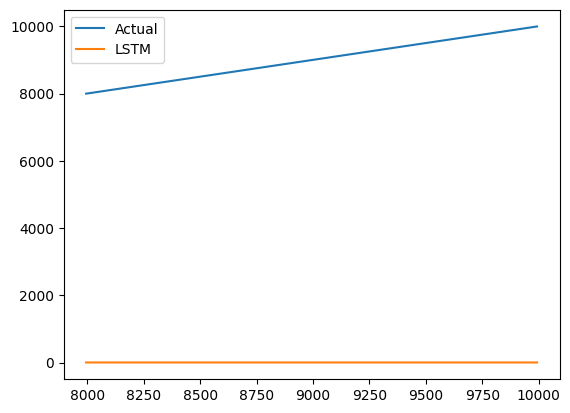

In [29]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Sales_ID'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()

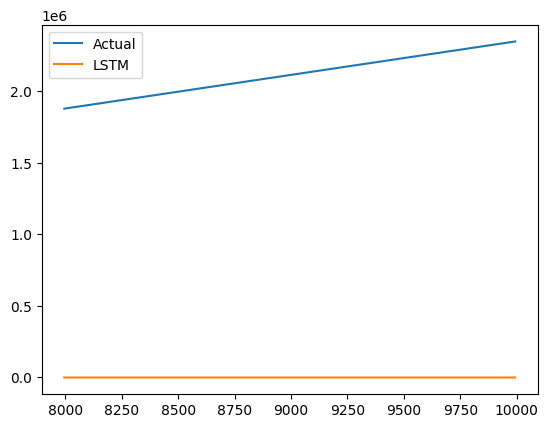

In [30]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Sales_Profit'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()

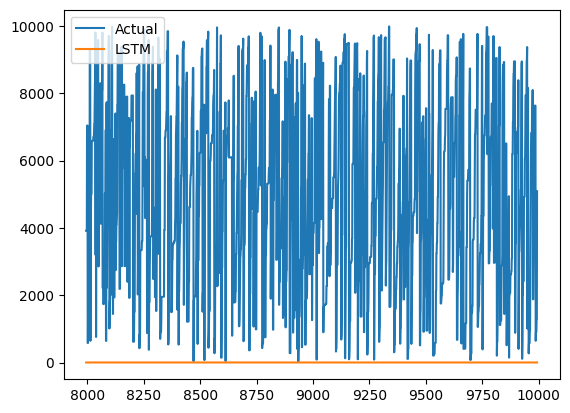

In [31]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Sales_Data_ID'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()